For my solo exploration, I want to look at different countries over time and compare their total consumpiton of electric power in thousands of kW per year. I also want to show how much of that total consumption is produceed by means of nuclear power.   

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Read only data rows into the dataframes. 

In [2]:
total_electricity = pd.read_csv('../data/total_electricity.csv',nrows=100000) #Contains the total electricty consumption of each contry for each year
nuclear_electricity = pd.read_csv('../data/nuclear_electricity.csv',nrows=915) #Contains the total nuclear 

Drop the footnotes column for cleaner look. Check the data types of each of the columns. 

In [3]:
total_electricity = total_electricity.drop(columns=['Quantity Footnotes'])

total_electricity_consumption = total_electricity[(total_electricity['Commodity - Transaction'] == 'Electricity - Final energy consumption')]
nuclear_electriciy_production = nuclear_electricity.drop(columns=['Quantity Footnotes'])

print('Total Electricity:\n',total_electricity.dtypes,'\n\nNuclear Electricity:\n',nuclear_electricity.dtypes)

Total Electricity:
 Country or Area             object
Commodity - Transaction     object
Year                         int64
Unit                        object
Quantity                   float64
dtype: object 

Nuclear Electricity:
 Country or Area             object
Commodity - Transaction     object
Year                         int64
Unit                        object
Quantity                   float64
Quantity Footnotes         float64
dtype: object


Lets first look at the total electricity consumption for each country in a recent year with adequate data, 2019. This way we can estimate countries with the highest engergy consumptions. 

In [13]:
total_electricity_consumption_2019 = total_electricity_consumption[total_electricity_consumption['Year'] == 2019]
total_nuclear_production_2019 = nuclear_electriciy_production[nuclear_electriciy_production['Year'] == 2019]

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Set floats to 2 decimal points
total_electricity_consumption_2019['Quantity'].describe() #Summary stats on the Electric consumption 2019


count       125.00
mean     110837.11
std      584041.16
min          17.80
25%         635.00
50%        6484.17
75%       30930.00
max     6298689.00
Name: Quantity, dtype: float64

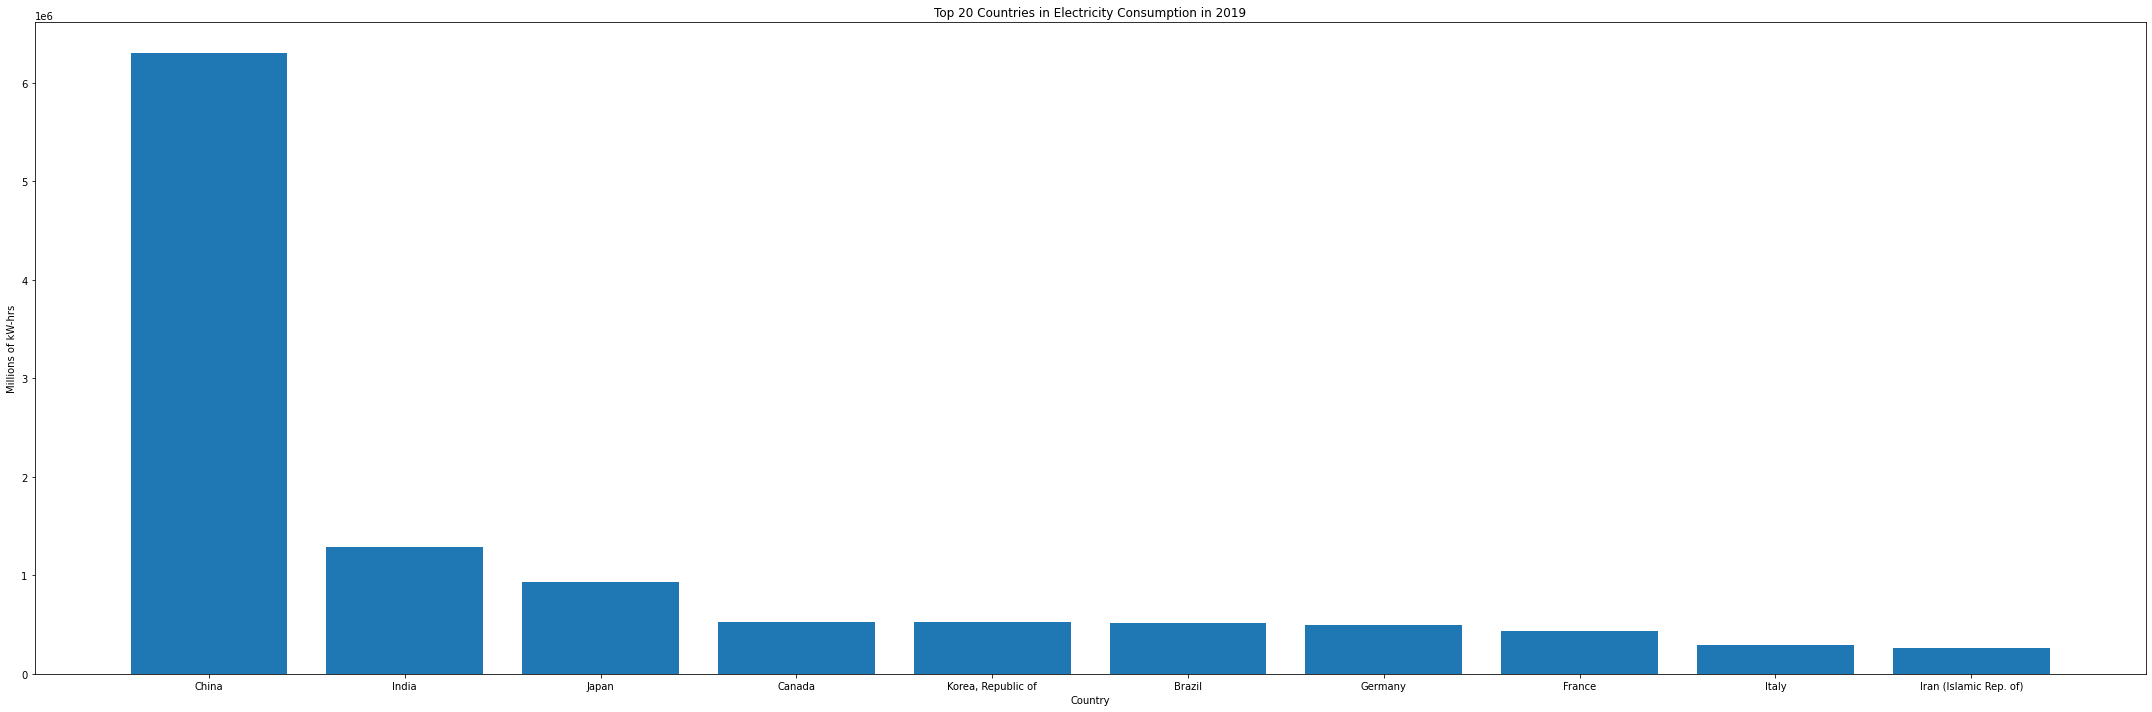

In [6]:
#This will give the top 10 consumers of elctricity for the year 2019, we just want a glimpse of some of the top countries
fig_1_data = total_electricity_consumption_2019.sort_values(by=['Quantity'], ascending=False).iloc[0:10,:]

plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.autolayout"] = True
plt.bar(fig_1_data['Country or Area'],fig_1_data['Quantity'])
plt.xlabel('Country')
plt.ylabel('Millions of kW-hrs')
plt.title('Top 20 Countries in Electricity Consumption in 2019')
plt.show()


In [7]:
print('Top ten countries in enrgy consumtion: \n', fig_1_data['Country or Area'])

Top ten countries in enrgy consumtion: 
 32145                     China
74863                     India
83574                     Japan
28249                    Canada
89034        Korea, Republic of
21695                    Brazil
62077                   Germany
56743                    France
81215                     Italy
76591    Iran (Islamic Rep. of)
Name: Country or Area, dtype: object


For some reason, The US which is a top consumer of electricity, is not showing up on my list. I believe this was an issue with the original UN data categories. They were not included in the UN in the Final consumtion category for some reason.  

Now that we have an idea of which countries consume a majority of the electricity, we will use those top 10 to compare how much of that energy was produced by nuclear. I imagine that most of these countries still produce a majority of their energy from coal and other sources so these should relatively low values. 

TypeError: unhashable type: 'numpy.ndarray'

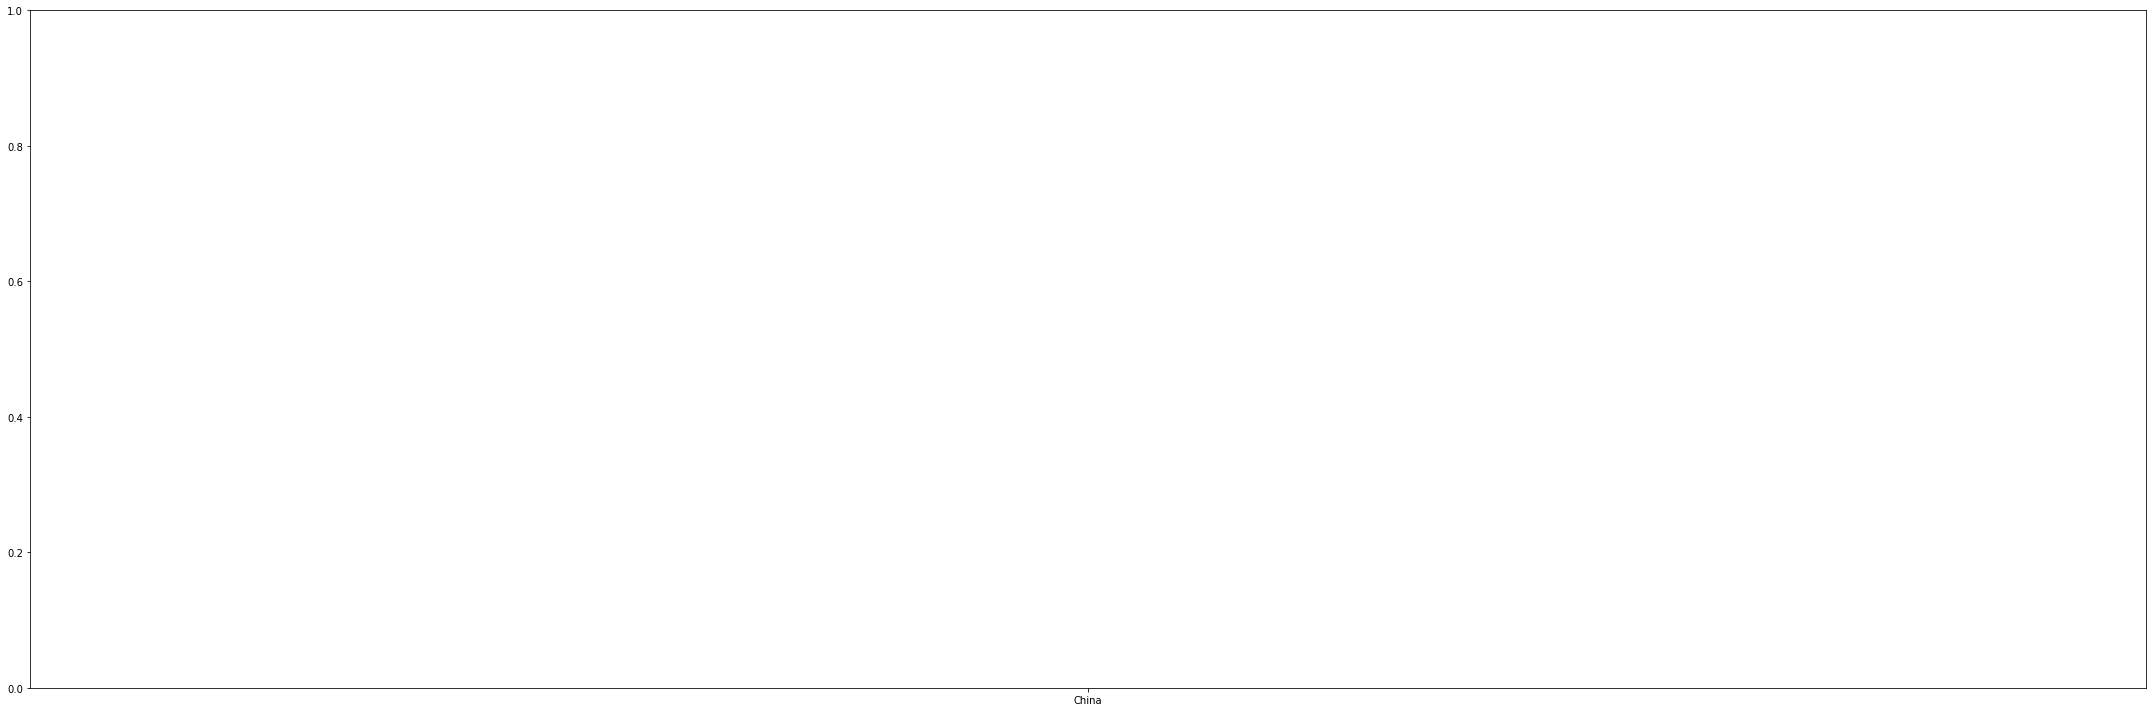

In [19]:
nuclear_prod_x = fig_1_data['Country or Area']#Use the same coutnries from the first figure
nuclear_prod_y = total_nuclear_production_2019[total_nuclear_production_2019['Country or Area'].isin(fig_1_data['Country or Area'])]
fig_2, ax = plt.subplots()
nuclear_prod = ax.bar(label='Nuclear Electricity Production'
                    ,x = nuclear_prod_x
                    ,height = nuclear_prod_y
                    )




Now lets look at these trends over a period of time to see the growth in nuclear electricity production. 